In [1]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(tidyr)
filepath <- '/Users/cyz/survey/active_survey/'


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
dataset <- 'cces18'
cur_rank <- 4
cur_alpha <- 1
cur_completer <- 'bpmf'
cur_vmethod <- 'row-norm'

In [3]:
source('eval_util.R')

In [4]:
results <- read_results(dataset) %>% filter(strategy != 'epsilon_greedy')
get_sample_sizes(results)

eval_method completer strategy   rank v_method optimality alpha n 
1  lococv      bpmf      active     2    row-norm A          1      1
2  lococv      bpmf      active     4    row-norm A          1      1
3  lococv      bpmf      random     2    row-norm A          1      1
4  lococv      bpmf      random     4    row-norm A          1      1
5  lococv      bpmf      sequential 2    row-norm A          1      1
6  lococv      bpmf      sequential 4    row-norm A          1      1
7  sparsify    bpmf      active     2    row-norm A          1     10
8  sparsify    bpmf      active     4    row-norm A          1     10
9  sparsify    bpmf      random     2    row-norm A          1     10
10 sparsify    bpmf      random     4    row-norm A          1     10
11 sparsify    bpmf      sequential 2    row-norm A          1     10
12 sparsify    bpmf      sequential 4    row-norm A          1     10

In [5]:
strategy_colors <- c('random'='black', 'active'='red', 'sequential'='blue')

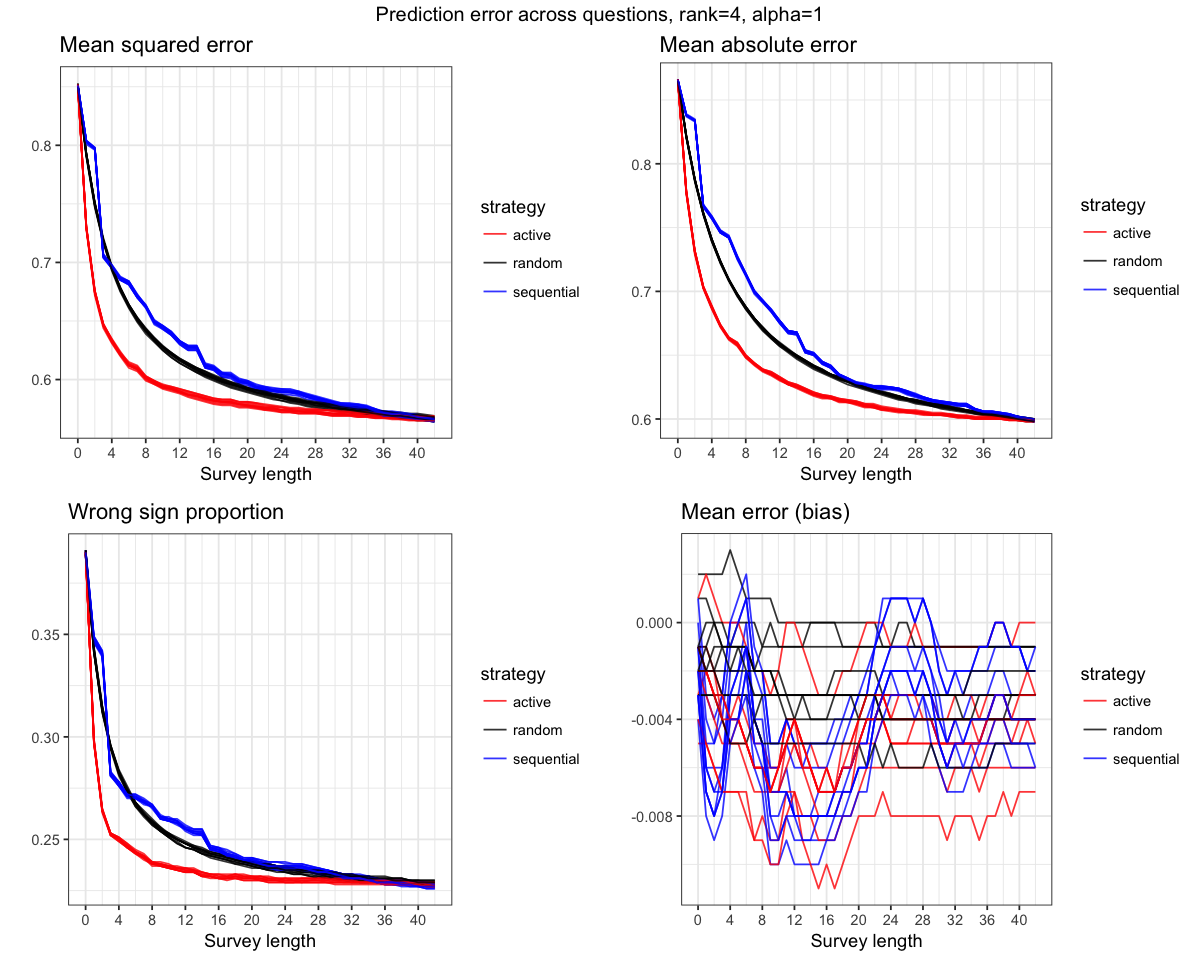

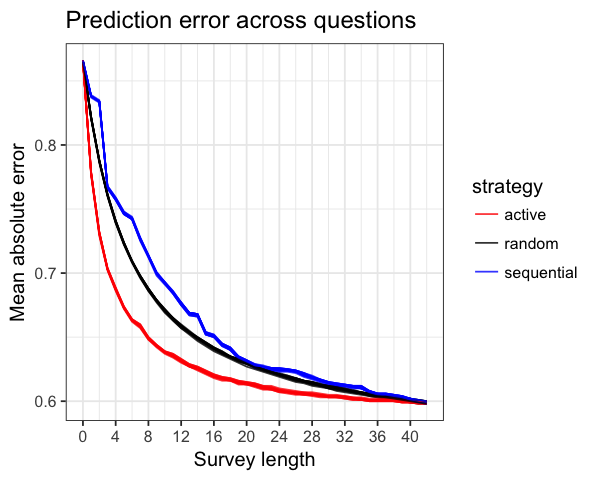

In [6]:
plot_aggregate_error(optimality_type='A')
plot_aggregate_error(optimality_type='A', metric='mae')

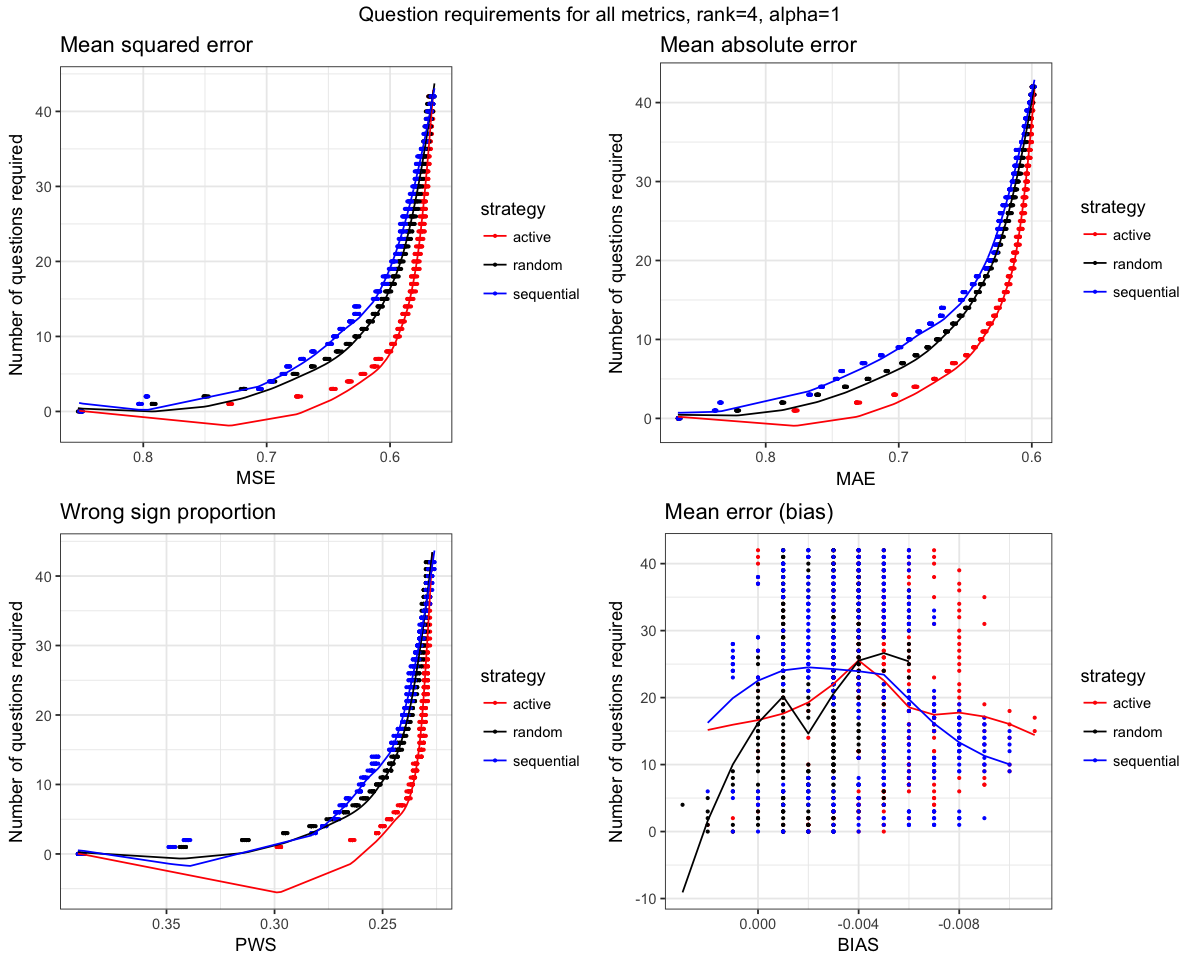

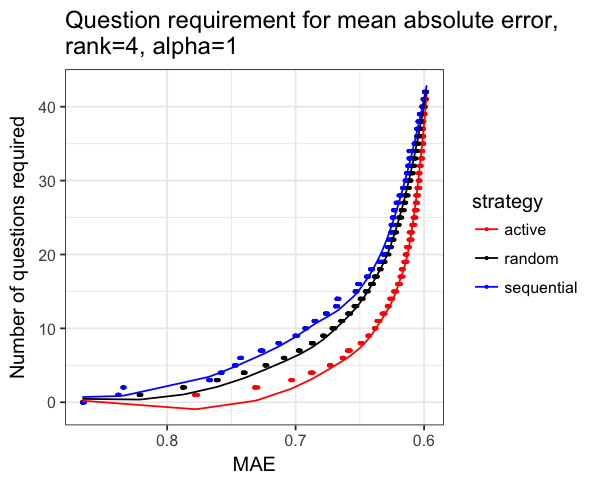

In [7]:
plot_aggregate_error_inverse(optimality_type='A')
plot_aggregate_error_inverse(optimality_type='A', metric='mae')

Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

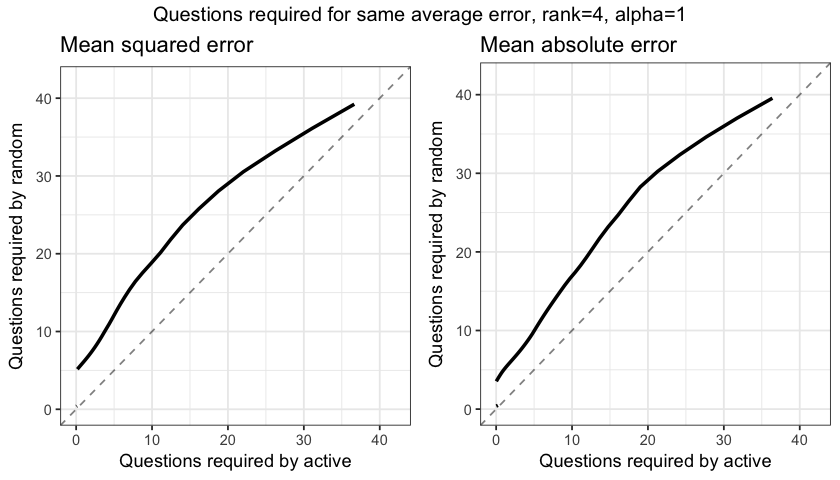

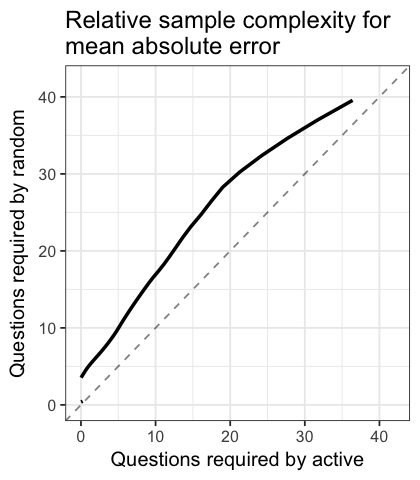

In [8]:
plot_method_comparison(optimality_type='A', base_method='active', compare_method='random')
plot_method_comparison(optimality_type='A', base_method='active', compare_method='random', metric='mae')

In [9]:
# plot_per_question_error(optimality_type='A')

Warning message:
“Column `columns`/`question` joining factors with different levels, coercing to character vector”

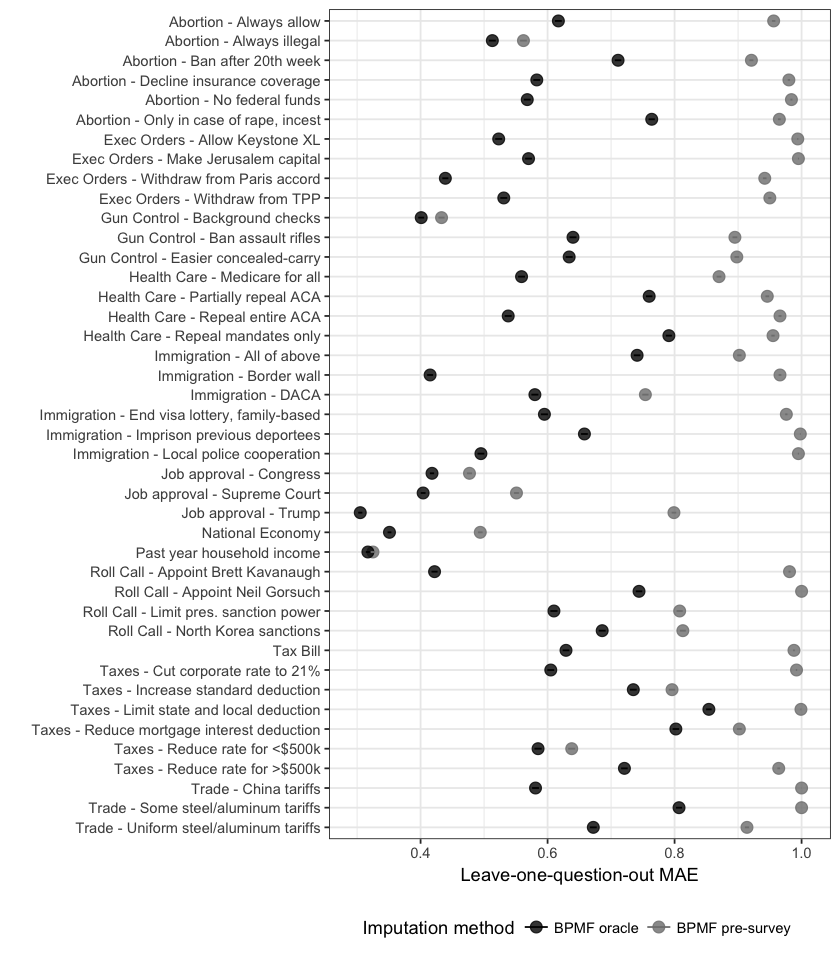

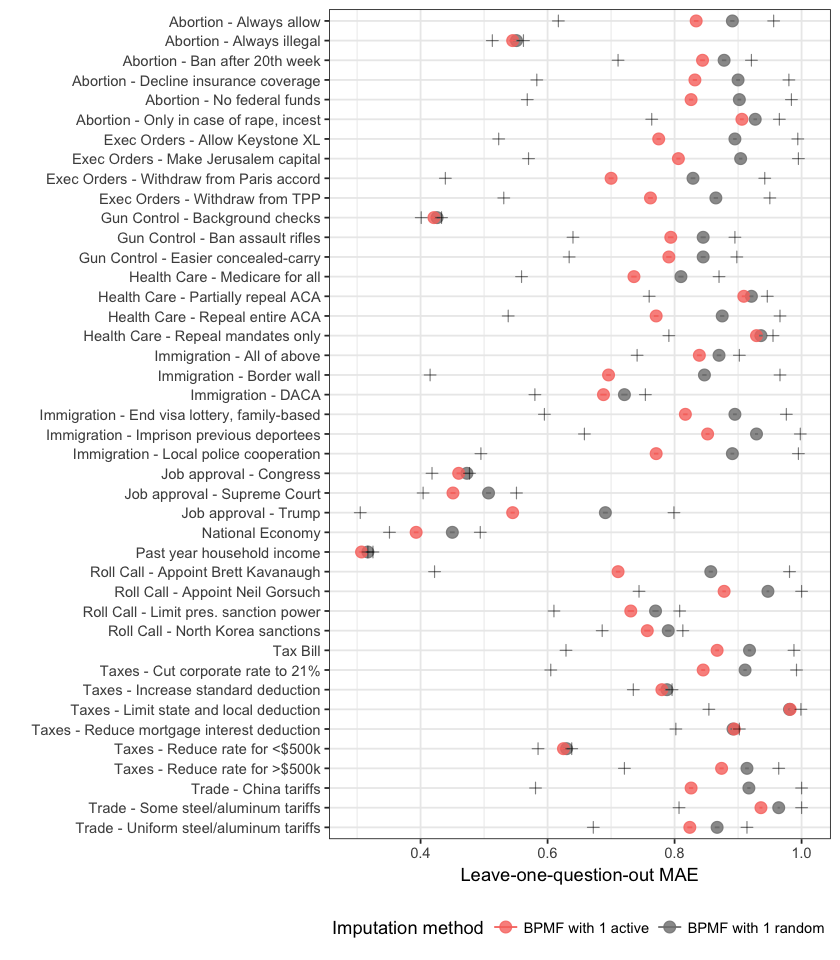

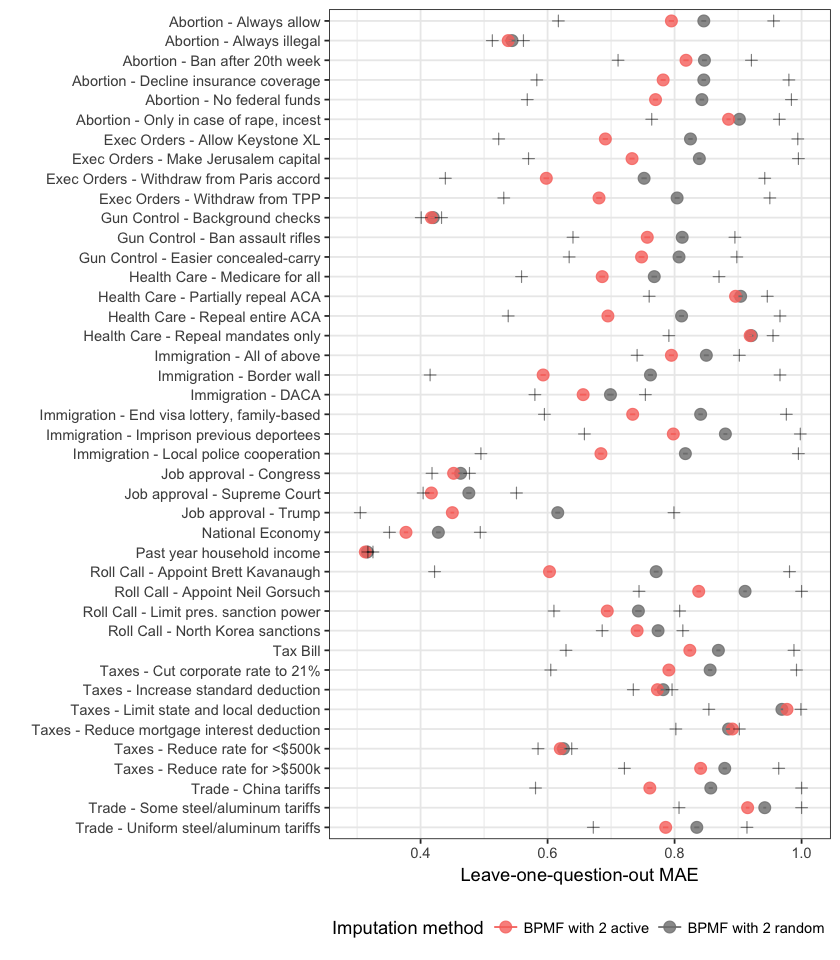

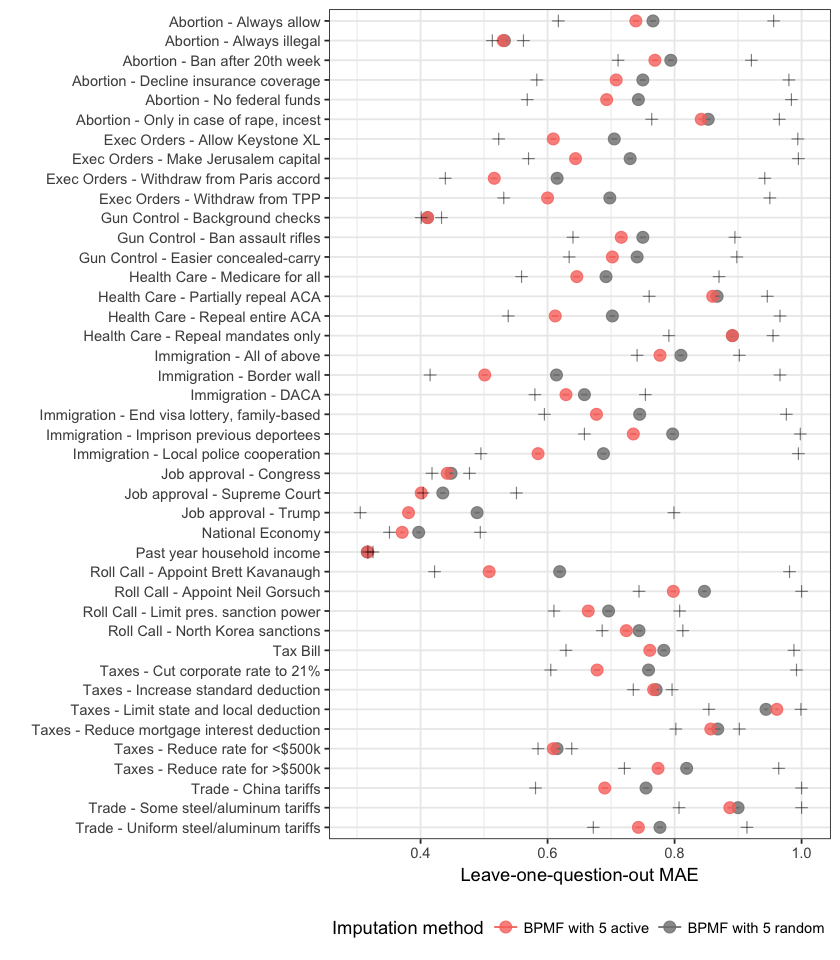

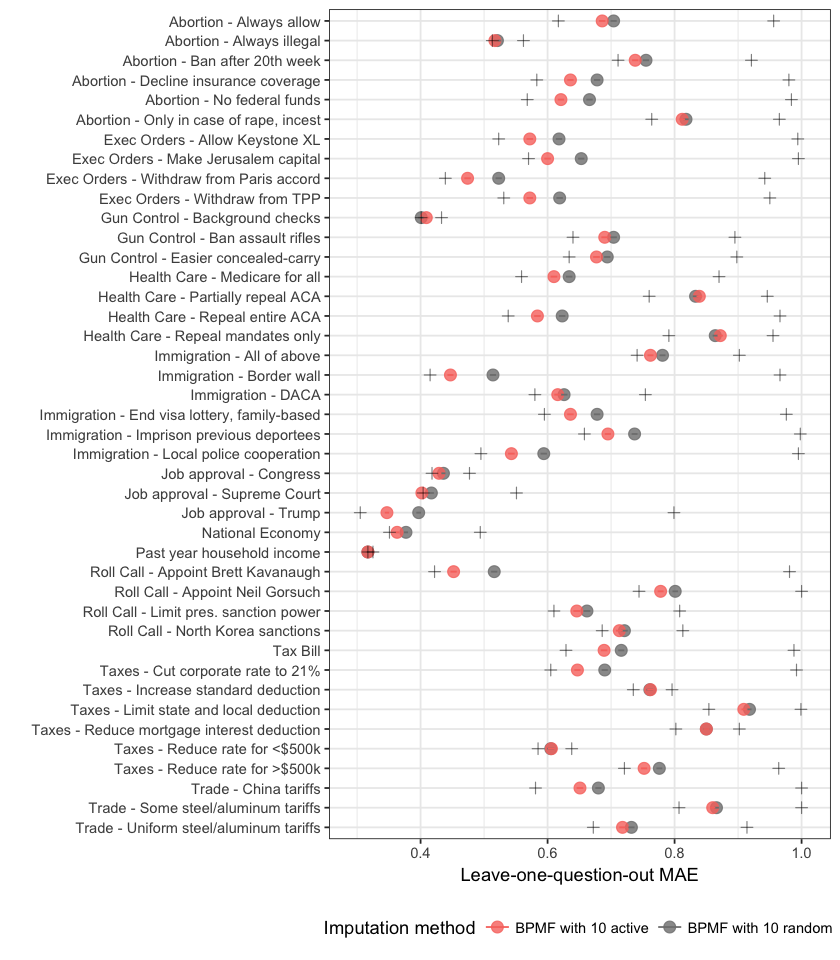

Warning message:
“Column `columns`/`question` joining factors with different levels, coercing to character vector”

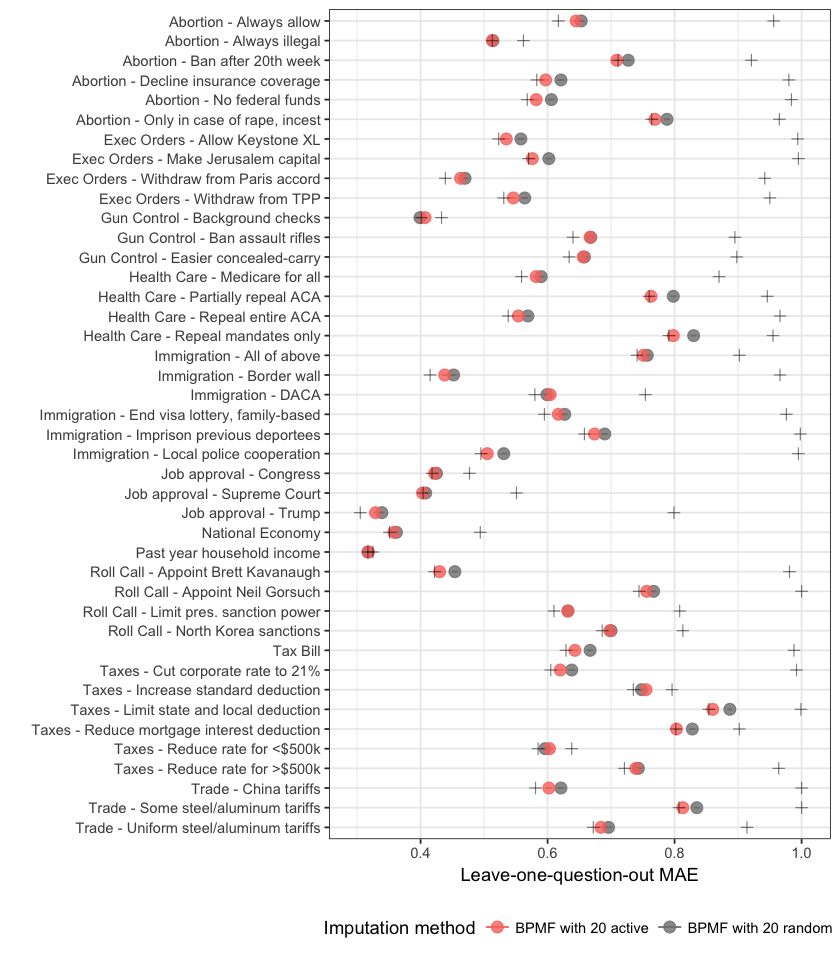

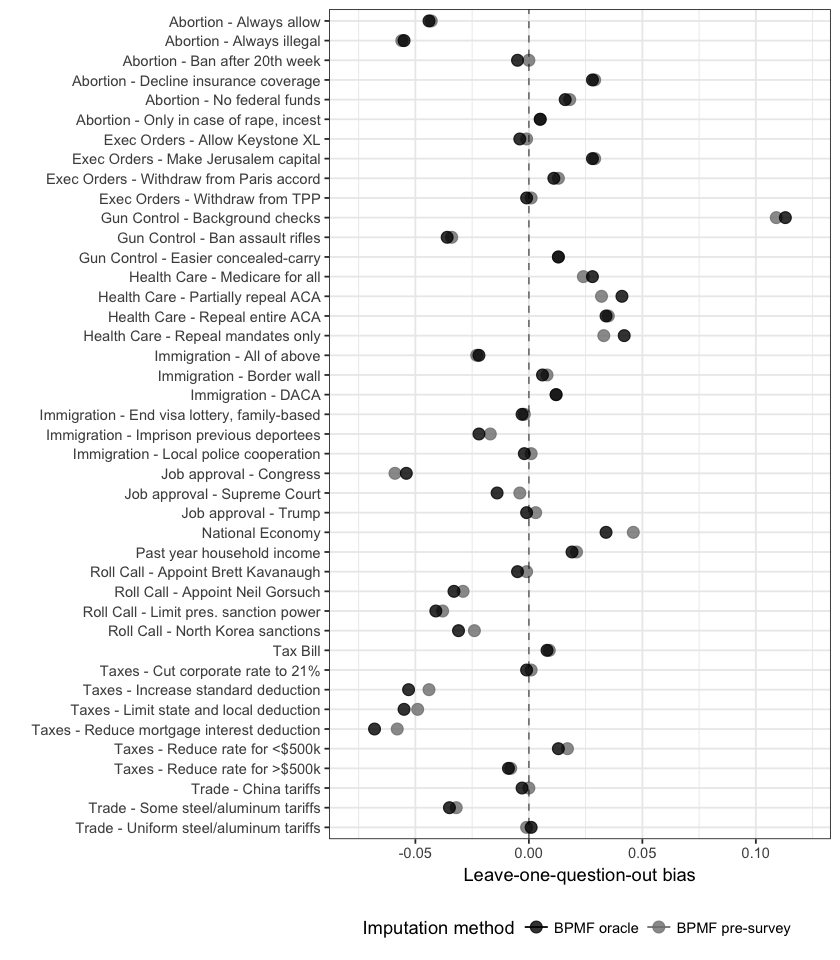

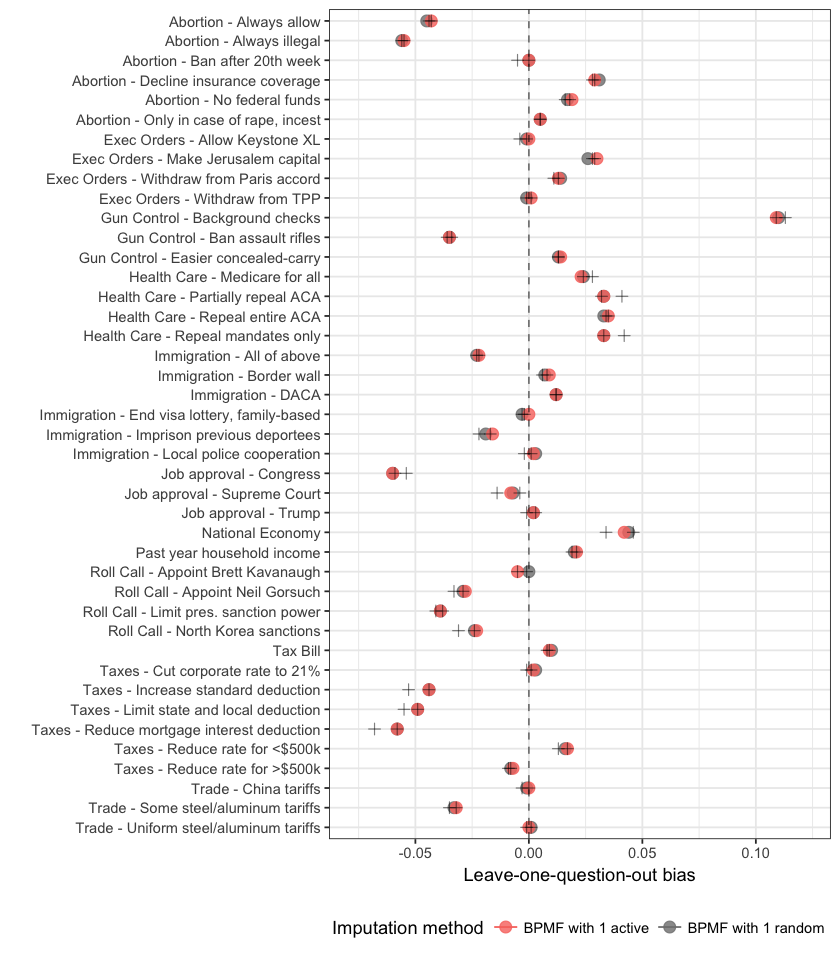

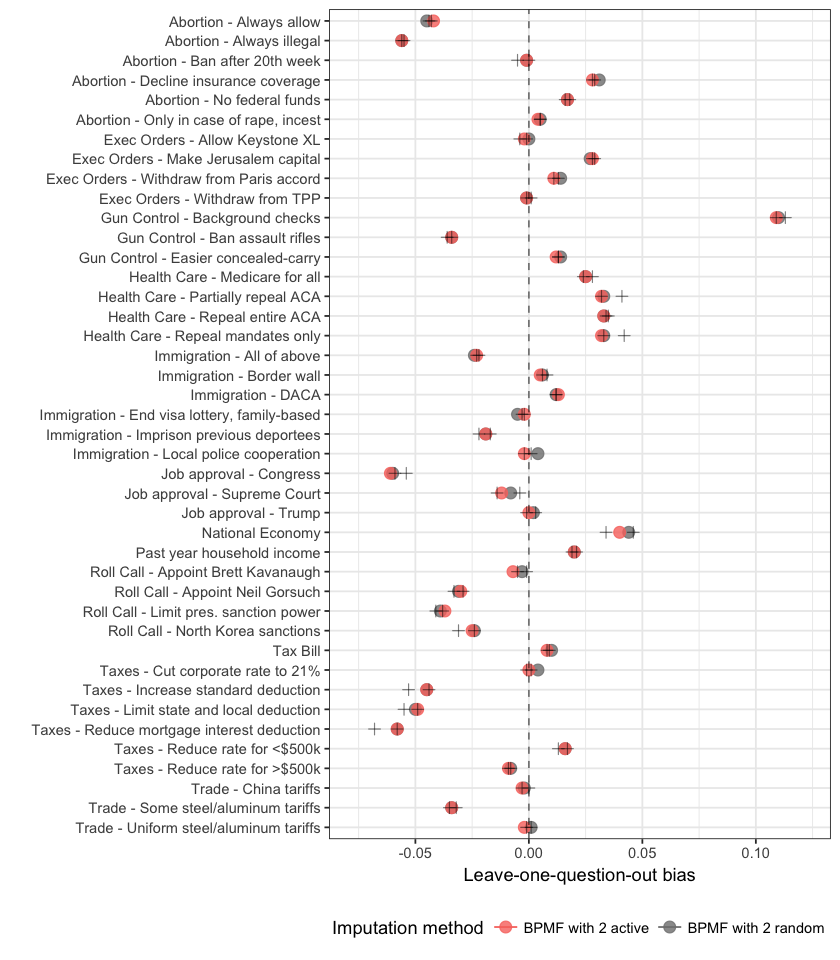

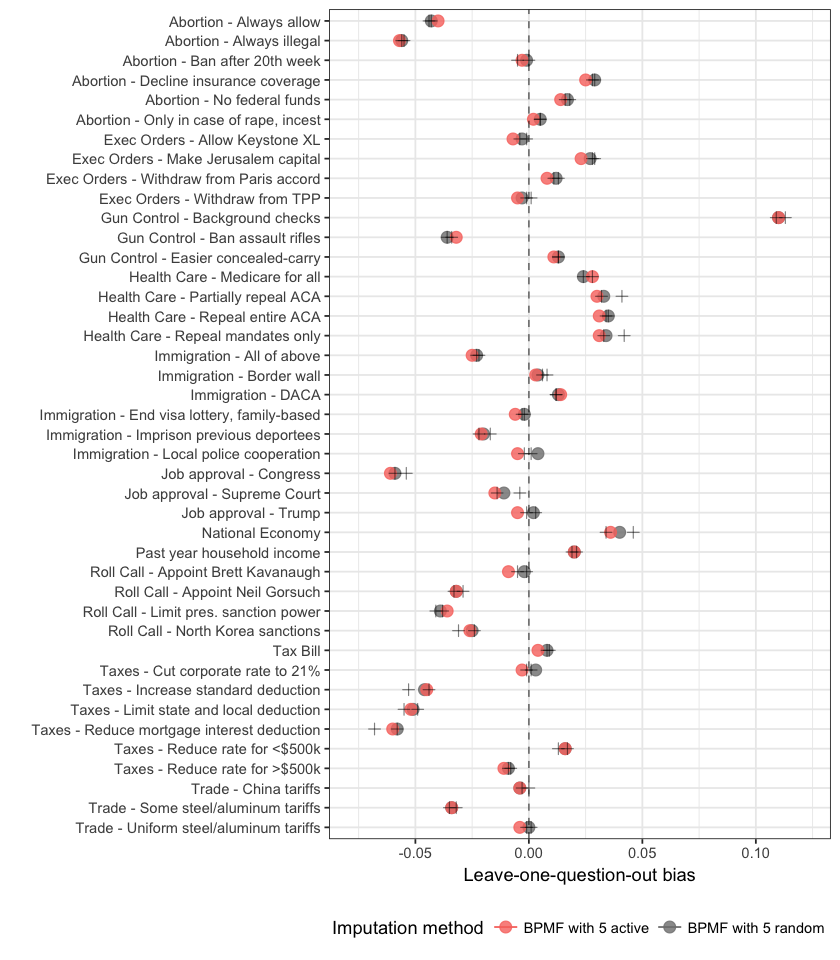

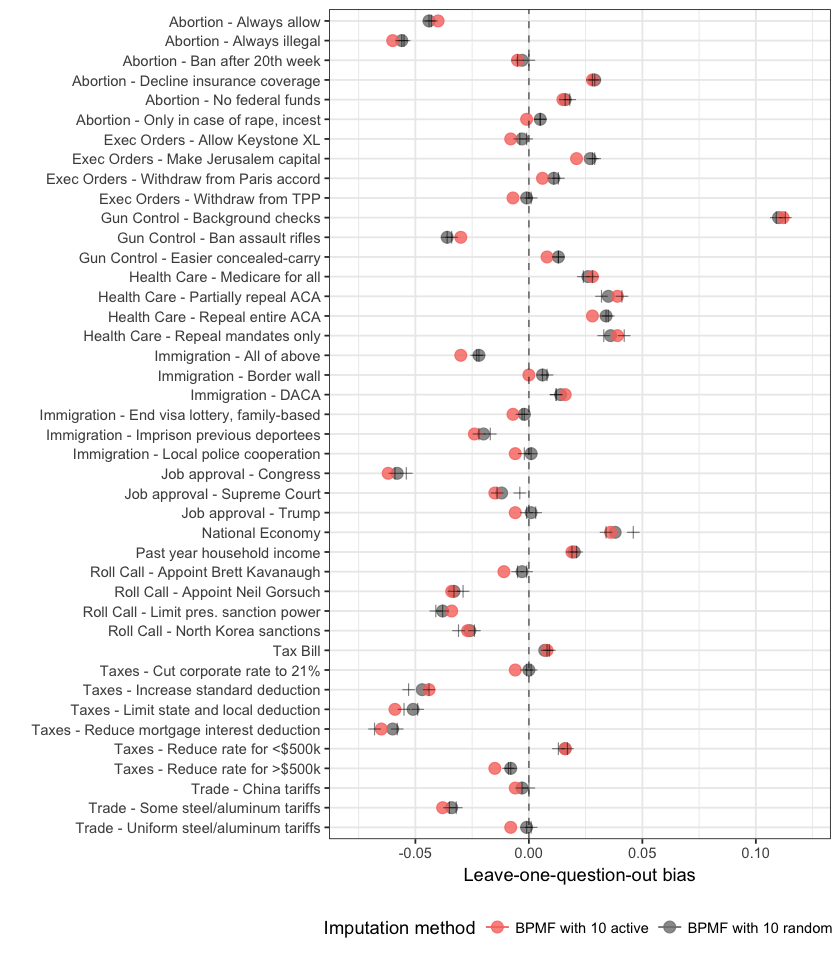

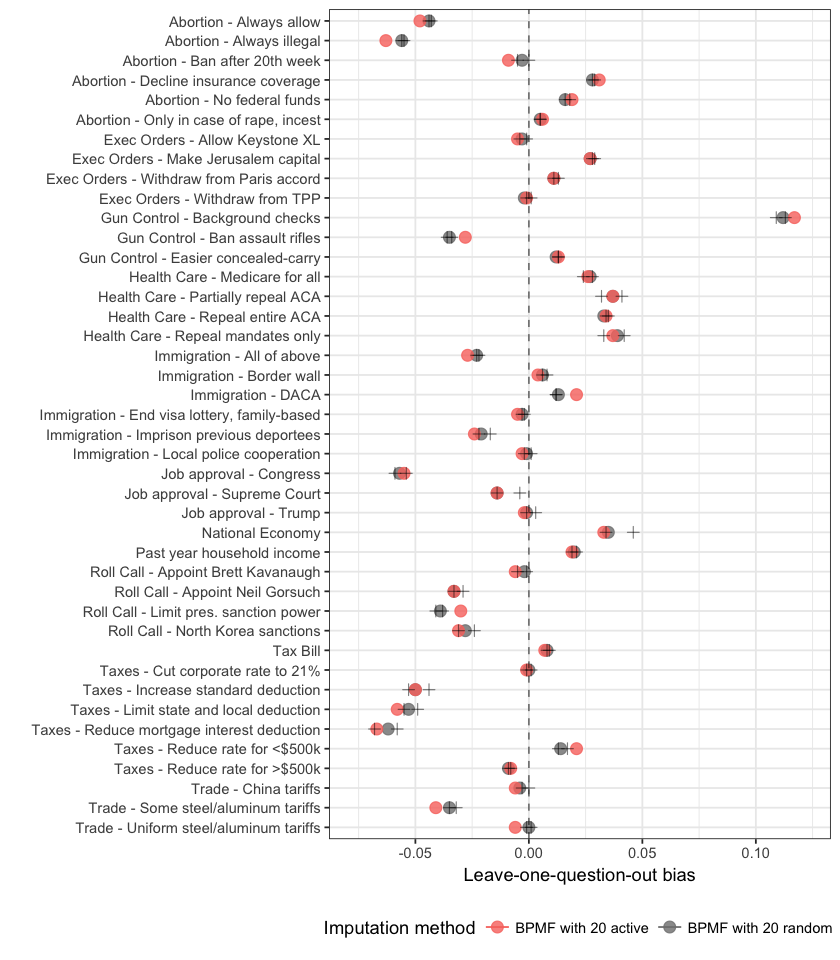

In [10]:
question_df <- read.csv(paste0(filepath, 'data/cces/cces18_questions_short.csv'), stringsAsFactors = T)
plot_per_question_comparison(y_var='mae', sd_var='sdae', y_var_readable='MAE', question_df=question_df)
plot_per_question_comparison(y_var='bias', y_var_readable='bias', question_df=question_df)

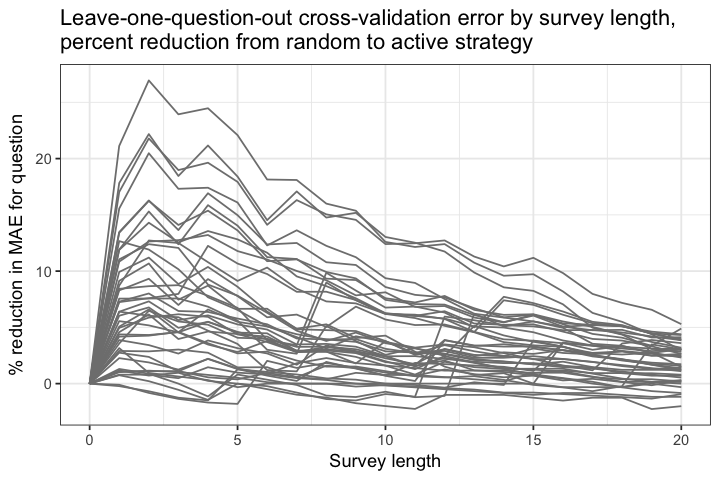

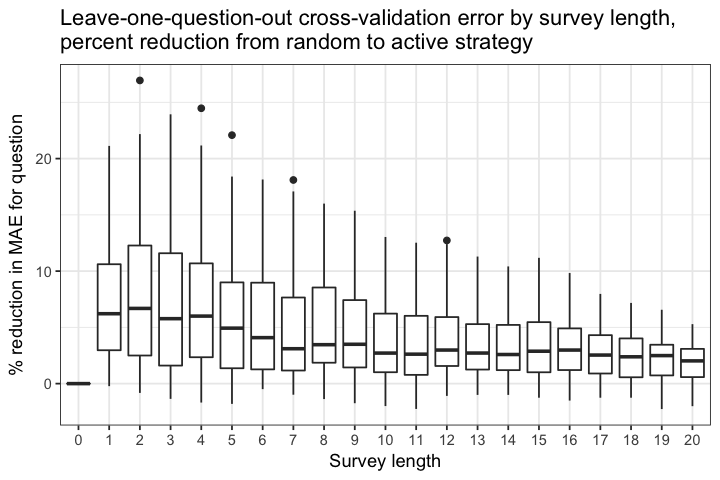

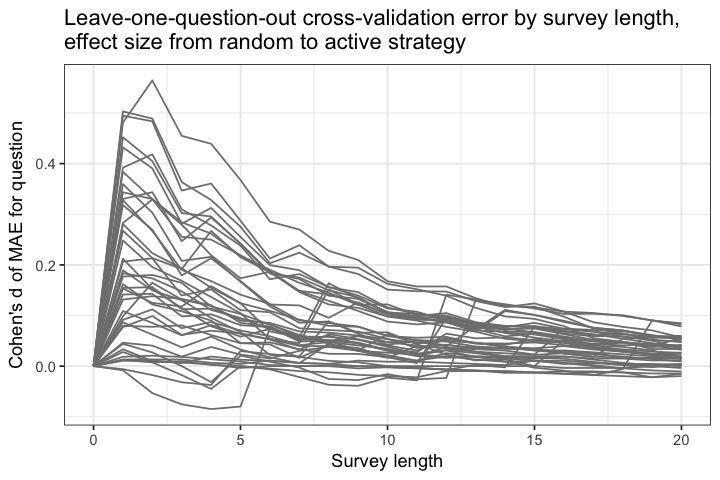

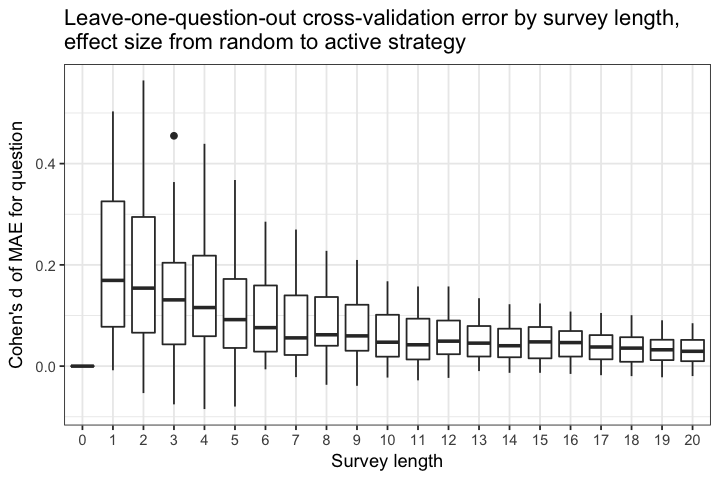

In [11]:
base_method = 'random'
compare_method = 'active'
plot_error_diff(optimality_type='A', base_method=base_method, compare_method=compare_method, y_var='mae', show_max_qnum=20)
plot_error_diff(optimality_type='A', base_method=base_method, compare_method=compare_method, y_var='mae', show_max_qnum=20, plot_error_diff_fn=plot_error_diff_box)
plot_effect_size(optimality_type='A', base_method=base_method, compare_method=compare_method, y_var='mae', sd_var='sdae', show_max_qnum=20)
plot_effect_size(optimality_type='A', base_method=base_method, compare_method=compare_method, y_var='mae', sd_var='sdae', show_max_qnum=20, plot_error_diff_fn=plot_error_diff_box)


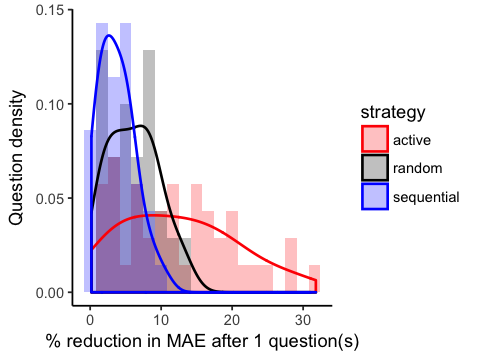

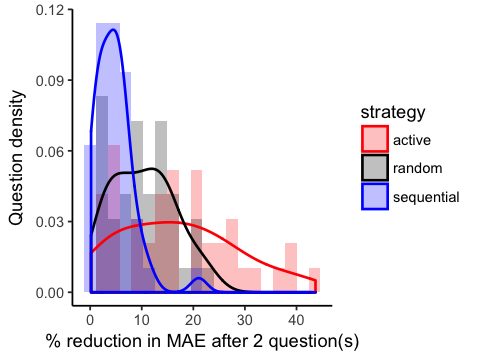

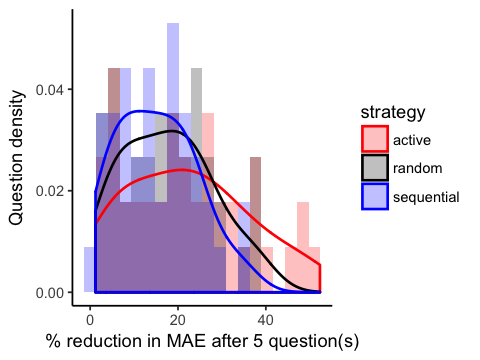

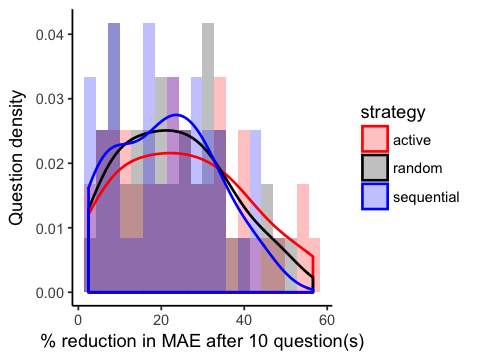

In [12]:
error_reduction_results <- plot_error_reduction_all(y_var='mae')

In [13]:
error_reduction_results %>%
    group_by(length, strategy) %>%
    summarize(pct_reduction_p50 = median(pct_reduction))

length strategy   pct_reduction_p50
1   0      active      0.000000        
2   0      random      0.000000        
3   0      sequential  0.000000        
4   1      active     12.057684        
5   1      random      5.744298        
6   1      sequential  3.346356        
7   2      active     16.399595        
8   2      random      9.703687        
9   2      sequential  4.168643        
10  3      active     17.720045        
11  3      random     12.659541        
12  3      sequential 12.588153        
13  4      active     19.965286        
14  4      random     15.057670        
15  4      sequential 13.552463        
16  5      active     21.013140        
17  5      random     16.842207        
18  5      sequential 14.500504        
19  6      active     21.911596        
20  6      random     18.236429        
21  6      sequential 15.697788        
22  7      active     21.972913        
23  7      random     19.407747        
24  7      sequential 17.769040        
25  8      active     23.088365        
26  8      random     20.467333        
27  8      sequential 19.178438        
28  9      active     23.646091        
29  9      random     21.248149        
30  9      sequential 20.540778        
⋮   ⋮      ⋮          ⋮                
97  32     active     26.81509         
98  32     random     27.04752         
99  32     sequential 26.93355         
100 33     active     27.20615         
101 33     random     27.10339         
102 33     sequential 27.06851         
103 34     active     27.25263         
104 34     random     27.15925         
105 34     sequential 27.45247         
106 35     active     27.31789         
107 35     random     27.21512         
108 35     sequential 27.45247         
109 36     active     27.31789         
110 36     random     27.36173         
111 36     sequential 27.36173         
112 37     active     27.42846         
113 37     random     27.41760         
114 37     sequential 27.36173         
115 38     active     27.48432         
116 38     random     27.47346         
117 38     sequential 27.36173         
118 39     active     27.48432         
119 39     random     27.52933         
120 39     sequential 27.41760         
121 40     active     27.49445         
122 40     random     27.52933         
123 40     sequential 27.52933         
124 41     active     27.58519         
125 41     random     27.58519         
126 41     sequential 27.58519